### Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

There are 10 real-valued features: radius, texture, perimeter, area, smoothness, concavity, concave points, symmetry and fractal dimension.

The mean, standard error and worst of each of the features is given in the data.

Each row has an ID number and a diagnosis (M for malignant or B for benign).

In [82]:
import pandas as pd

data = pd.read_csv("data.csv")

# All values in this column were NaN
data.drop("Unnamed: 32", axis=1, inplace=True)

data["diagnosis"] = data["diagnosis"].map({"M":"Malignant", "B":"Benign"})

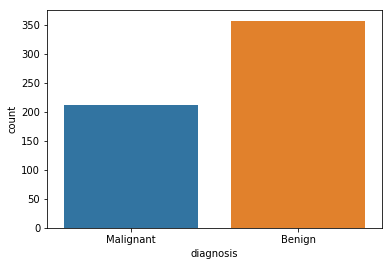

In [83]:
import seaborn as sns

sns.countplot(data["diagnosis"], label="count")

### Feature Selection

Note: use P-value in the future: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

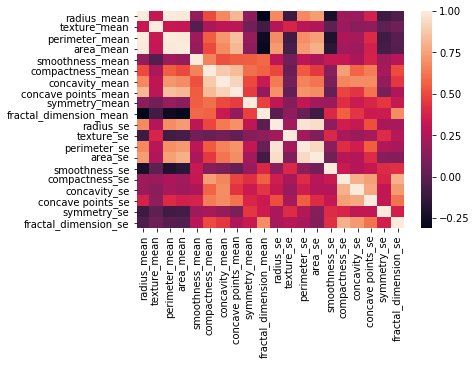

In [84]:
mean_of_features = list(data.columns[2:12])
se_of_features = list(data.columns[12:22])
worst_of_features = list(data.columns[22:32])

data = data.drop("id", axis=1)
# mean and worst are obviously correlated anyway
features_data = data.drop(worst_of_features, axis=1)
corr = features_data.corr()
sns.heatmap(corr)

In [85]:
for i in range(corr.shape[0]):
    for j in range(i):
        if corr.iloc[i, j] >= 0.9:
            print(corr.index[i] + "    " + corr.index[j])

perimeter_mean    radius_mean
area_mean    radius_mean
area_mean    perimeter_mean
concave points_mean    concavity_mean
perimeter_se    radius_se
area_se    radius_se
area_se    perimeter_se


Perimeter mean, radius mean and area mean are all correlated.<br>
Concave points mean is correlated to concavity mean.<br>
Perimeter standard error, radius standard error and area standard error are all correlated.<br>
Therefore, we can use only the area, removing the perimeter and radius. We can also remove the concave points mean and use only the concavity mean. We will also ignore standard error entirely for now for simplicity.

In [86]:
prediction_features = ["texture_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "symmetry_mean", 
                       "fractal_dimension_mean"]

In [87]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
194,Malignant,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.08,27.78,118.60,784.7,0.1316,0.4648,0.4589,0.17270,0.3000,0.08701
48,Benign,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,...,13.76,20.70,89.88,582.6,0.1494,0.2156,0.3050,0.06548,0.2747,0.08301
505,Benign,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,...,10.60,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.13640
447,Benign,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.2060,0.08308,0.3600,0.07285
219,Malignant,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,...,27.90,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568


In [90]:
# training data
x_train = train[prediction_features]
y_train = train.diagnosis

# test data
x_test = test[prediction_features]
y_test = test.diagnosis

### Model

Note: experiment with different models

In [92]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [93]:
# training

model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)